In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import random
import cv2
import glob
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from scipy import ndimage

In [2]:
!pwd

/Users/emma-clairemccarthy/Desktop/Metis/projects/falcon_alert


In [4]:
# os.chdir('per_imgs')
# if os.path.isdir('train/per') is False:

#     os.makedirs('train/per')
#     os.makedirs('train/no_per')    
    
#     os.makedirs('val/per')
#     os.makedirs('val/no_per')
    
#     os.makedirs('test/per')
#     os.makedirs('test/no_per')
    
# for c in random.sample(os.listdir('per/'), 100):
#         shutil.move('per/' + c, 'val/per')
# for c in random.sample(os.listdir('per/'), 50):
#     shutil.move('per/' + c, 'test/per')
    
# for c in random.sample(os.listdir('no_per/'), 100):
#     shutil.move('no_per/' + c, 'val/no_per')
# for c in random.sample(os.listdir('no_per/'), 50):
#     shutil.move('no_per/' + c, 'test/no_per')

In [93]:
# def get_images(path: str):
#     for i, j in enumerate(os.listdir(path)):
#         try:
#             img = image.load_img(path + j, target_size = (256, 256))
#             img = image.img_to_array(img)
#             img = np.expand_dims(img, axis = 0)
#             if i == 0:
#                 image_matrix = np.array(img)
#             else:
#                 np.append(img_matrix, img, axis = 0)
#         except:
#             pass
#     return image_matrix

In [13]:
# load images from each path, augment, then save to disk

augmenter = ImageDataGenerator(rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2)

In [14]:
pos_get_images_from = 'per_imgs/new_dataset/pos'
pos_save_here = 'per_imgs/new_dataset/aug_pos'

neg_get_images_from = 'per_imgs/new_dataset/neg'
neg_save_here = 'per_imgs/new_dataset/aug_neg'

In [17]:
def augment_images(original_image_path: str, augmented_image_path: str):
    for file in os.listdir(original_image_path):    
        image_path = original_image_path + '/' + file
        try:
            img = image.load_img(image_path)
            img_array = image.img_to_array(img)
            img_array = img_array.reshape((1,) + img_array.shape)
        
        
            augmenter = ImageDataGenerator(rotation_range=90, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2)
        
            augmenter.fit(img_array)

            for x, val in zip(augmenter.flow(img_array,
                    save_to_dir=augmented_image_path,
                     save_prefix='aug',
                    save_format='png'),range(2)):
                pass
        except:
            pass

In [18]:
# augment positive class images
augment_images(pos_get_images_from, pos_save_here)

In [19]:
# augment negative class images
augment_images(neg_get_images_from, neg_save_here)

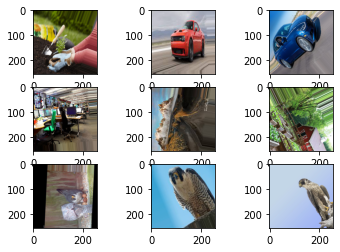

In [111]:
for i in range(9):
    plt.subplot(330 + 1 + i)

    batch = augmented_data.next()
    
    image = batch[0][0].astype('uint8')
    
    plt.imshow(image)

plt.show()

In [3]:
def cropper_256(img_from_path:str, img_to_path:str):
    for file in os.listdir(img_from_path):
        try:
            image_path = img_from_path + '/' + file
            img = image.load_img(image_path, target_size = (256, 256))
            image.save_img(img_to_path + '/' + file[:-4] + '-c.png', img, scale = True)
        except:
            pass
        
def cropper_224(img_from_path:str, img_to_path:str):
    for file in os.listdir(img_from_path):
        try:
            image_path = img_from_path + '/' + file
            img = image.load_img(image_path, target_size = (224, 224))
            image.save_img(img_to_path + '/' + file[:-4] + '-c.png', img, scale = True)
        except:
            pass

In [4]:
cropper_224('per_imgs/dataset_3/train/pos', 'per_imgs/dataset_3/cropped/train/pos')
cropper_224('per_imgs/dataset_3/train/neg', 'per_imgs/dataset_3/cropped/train/neg')
# cropper_224('per_imgs/dataset_3/test/pos', 'per_imgs/dataset_3/cropped/test/pos')
# cropper_224('per_imgs/dataset_3/test/neg', 'per_imgs/dataset_3/cropped/test/neg')
# cropper_224('per_imgs/dataset_3/val/neg', 'per_imgs/dataset_3/cropped/val/neg')
# cropper_224('per_imgs/dataset_3/val/pos', 'per_imgs/dataset_3/cropped/val/pos')

In [49]:
# cropper_224('per_imgs/dataset_3/test2/neg', 'per_imgs/dataset_3/cropped/test2/neg')
# cropper_224('per_imgs/dataset_3/test2/pos', 'per_imgs/dataset_3/cropped/test2tes/pos')

In [50]:
# cropper_224('per_imgs/dataset_3/test_nsw/neg', 'per_imgs/dataset_3/cropped/test_nsw/neg')
# cropper_224('per_imgs/dataset_3/test_nsw/pos', 'per_imgs/dataset_3/cropped/test_nsw/pos')